In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import random
import csv

In [4]:
# Read in 100 Kicktarter projects from the file 'kickstarter_data.csv'
kickstarter_df = pd.read_csv('kickstarter_data.csv', nrows=100)

In [5]:
# The DataFrame is the main structure that we use in Pandas
# We use it to store data by different values of different types in an organized table
kickstarter_df

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


In [6]:
# We can get overall stats regarding our indexes
kickstarter_df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,9.272811e+08,19796.710000,9134.102600,125.130000,7754.993100,9354.592000,19726.169400
std,2.486553e+08,37117.042835,20203.825442,325.564022,17766.627521,21418.768917,37012.836925
min,1.000365e+07,100.000000,0.000000,0.000000,0.000000,0.000000,65.550000
25%,1.000072e+09,2875.000000,89.500000,3.000000,78.500000,96.575000,2894.837500
50%,1.000184e+09,7500.000000,1116.000000,24.500000,771.910000,1116.000000,7608.205000
75%,1.000271e+09,15689.250000,8335.085000,96.250000,8176.007500,8335.085000,15857.192500
max,1.000399e+09,250000.000000,124998.000000,2784.000000,124998.000000,124998.000000,250000.000000


In [7]:
# We can sort by index
kickstarter_df.sort_values('backers', ascending=False)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
63,1000235643,HIIT Bottle™,Drinks,Food,USD,2015-04-27,15000.0,2015-03-13 18:33:08,124998.00,successful,2784,US,124998.00,124998.00,15000.00
46,1000183112,Hot Chicken Takes Over.,Restaurants,Food,USD,2014-10-16,40000.0,2014-09-16 02:31:08,63401.00,successful,855,US,63401.00,63401.00,40000.00
29,100011318,My Moon - Animated Short Film,Animation,Film & Video,USD,2017-05-03,50000.0,2017-04-03 17:11:33,57577.31,successful,840,US,10120.00,57577.31,50000.00
14,1000057089,Tombstone: Old West tabletop game and miniatur...,Tabletop Games,Games,GBP,2017-05-03,5000.0,2017-04-05 19:44:18,94175.00,successful,761,GB,57763.78,121857.33,6469.73
50,1000201265,I'LL SEE YOU IN MY DREAMS - narrative feature ...,Narrative Film,Film & Video,USD,2014-02-05,60000.0,2014-01-11 00:57:14,61365.16,successful,632,US,61365.16,61365.16,60000.00
20,1000072011,CMUK. Shoes: Take on Life Feet First.,Fashion,Fashion,USD,2013-12-30,20000.0,2013-11-25 07:06:11,34268.00,successful,624,US,34268.00,34268.00,20000.00
27,1000104688,Permaculture Skills,Webseries,Film & Video,CAD,2014-12-14,17757.0,2014-11-14 18:02:00,48905.00,successful,571,CA,43203.25,42174.03,15313.04
31,1000117861,Ledr workbook: one tough journal!,Product Design,Design,USD,2016-10-08,1000.0,2016-09-07 13:14:26,47266.00,successful,549,US,11253.00,47266.00,1000.00
59,1000232288,Empires at Sea,Tabletop Games,Games,USD,2015-06-23,25000.0,2015-05-24 12:47:52,37199.00,successful,448,US,37199.00,37199.00,25000.00
90,1000348690,The Silence of Hollowind - Urban Fantasy RPG,Tabletop Games,Games,EUR,2017-11-23,5000.0,2017-10-24 16:58:01,11238.00,successful,346,IT,5509.51,13347.43,5938.52


In [8]:
# We can filter out entries that meet certain criteria
kickstarter_df[kickstarter_df.state == 'successful']

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
11,100005484,Lisa Lim New CD!,Indie Rock,Music,USD,2013-04-08,12500.0,2013-03-09 06:42:58,12700.00,successful,100,US,12700.00,12700.00,12500.00
14,1000057089,Tombstone: Old West tabletop game and miniatur...,Tabletop Games,Games,GBP,2017-05-03,5000.0,2017-04-05 19:44:18,94175.00,successful,761,GB,57763.78,121857.33,6469.73
18,1000070642,Mike Corey's Darkness & Light Album,Music,Music,USD,2012-08-17,250.0,2012-08-02 14:11:32,250.00,successful,7,US,250.00,250.00,250.00
20,1000072011,CMUK. Shoes: Take on Life Feet First.,Fashion,Fashion,USD,2013-12-30,20000.0,2013-11-25 07:06:11,34268.00,successful,624,US,34268.00,34268.00,20000.00
24,1000091520,The Book Zoo - A Mini-Comic,Comics,Comics,USD,2014-11-12,175.0,2014-10-23 17:15:50,701.66,successful,66,US,701.66,701.66,175.00
25,1000102741,Matt Cavenaugh & Jenny Powers make their 1st a...,Music,Music,USD,2011-01-06,10000.0,2010-12-07 23:16:50,15827.00,successful,147,US,15827.00,15827.00,10000.00
27,1000104688,Permaculture Skills,Webseries,Film & Video,CAD,2014-12-14,17757.0,2014-11-14 18:02:00,48905.00,successful,571,CA,43203.25,42174.03,15313.04
28,1000104953,Rebel Army Origins: The Heroic Story Of Major ...,Comics,Comics,GBP,2016-01-28,100.0,2015-12-29 16:59:29,112.38,successful,27,GB,167.70,160.60,142.91


In [9]:
# Several criteria? No problem.
kickstarter_df[(kickstarter_df.state == 'failed') & (kickstarter_df.pledged > 1000.0) & (kickstarter_df.currency == 'USD')] 
# Find all failed kickstarters that raised more than $1000

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.0
19,1000071625,Boco Tea,Food,Food,USD,2012-06-02,5000.0,2012-05-03 17:24:32,1781.00,failed,40,US,1781.00,1781.00,5000.0
33,1000120287,BB130A,Public Art,Art,USD,2013-03-24,25000.0,2013-02-12 01:07:28,1395.00,failed,30,US,1395.00,1395.00,25000.0
35,1000129669,Squatch Watchers,Webseries,Film & Video,USD,2013-08-23,10000.0,2013-07-24 21:40:13,1373.37,failed,54,US,1373.37,1373.37,10000.0
78,1000320473,Uncommon Rhythm - Season One,Film & Video,Film & Video,USD,2013-09-13,29700.0,2013-08-15 11:16:24,10410.00,failed,76,US,10410.00,10410.00,29700.0
79,1000328150,Legacy of Svarog | a Unique 3D Action RPG and ...,Video Games,Games,USD,2015-10-30,50000.0,2015-08-31 06:33:31,1410.00,failed,38,US,1410.00,1410.00,50000.0
81,1000331311,AWE - Antediluvian Wars: Extermination Tactica...,Tabletop Games,Games,USD,2014-08-31,13000.0,2014-08-01 00:02:17,1811.00,failed,34,US,1811.00,1811.00,13000.0
88,1000340977,My Coffee Box,Drinks,Food,USD,2014-06-16,3000.0,2014-05-17 22:43:36,1027.00,failed,18,US,1027.00,1027.00,3000.0


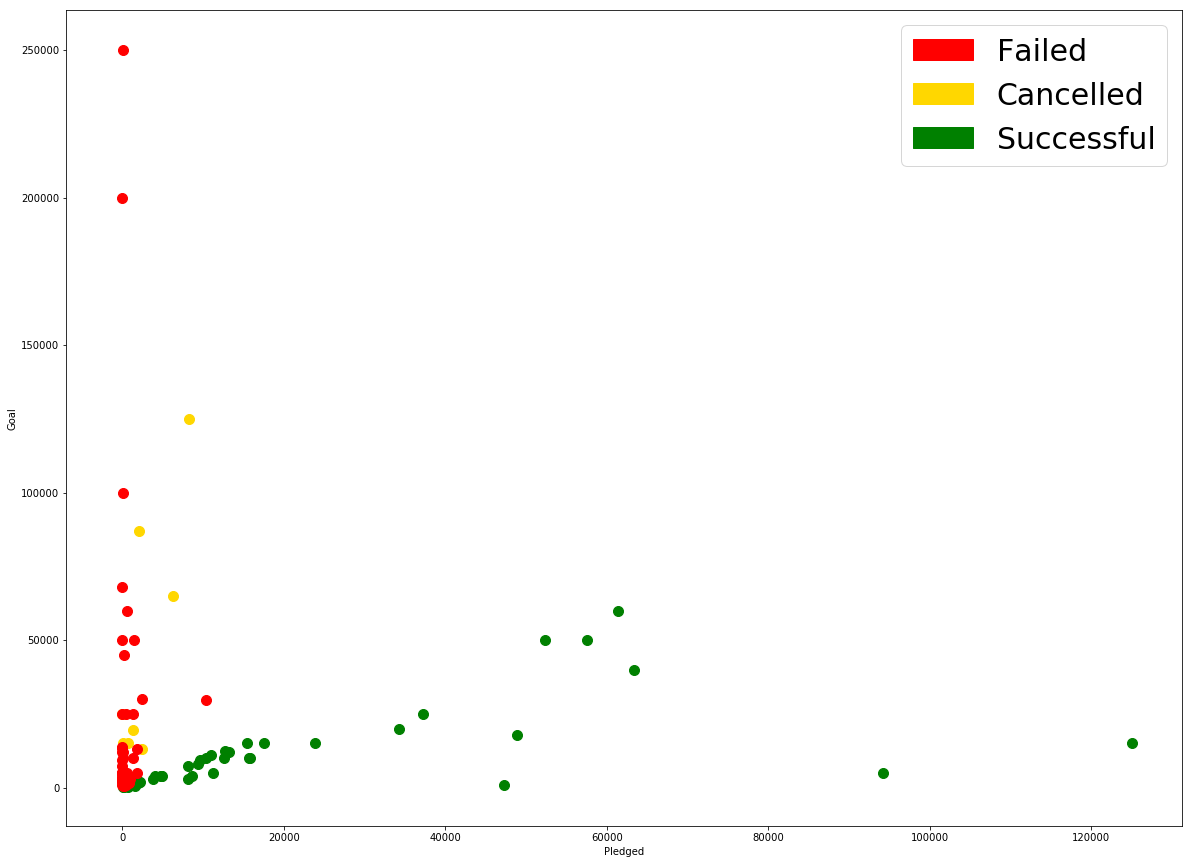

In [10]:
# Using DataFrames, we can do some pretty cool stuff with data visualization
#plt.scatter(kickstarter_df['pledged'], kickstarter_df['goal']);
#plt.axis([0, 20000, 0, 100000])

plt.rcParams['figure.figsize'] = [20,15]

colors = {
    'successful' : 'green',
    'canceled' : 'gold',
    'failed' : 'red'
}
status = ['successful', 'canceled', 'failed']

for state in status:
    temp_df = kickstarter_df[kickstarter_df.state == state]
    plt.scatter(temp_df['pledged'], temp_df['goal'], c=colors[state], s=100)

plt.xlabel("Pledged")
plt.ylabel("Goal")

red_patch = mpatches.Patch(color='red', label='Failed')
yellow_patch = mpatches.Patch(color='gold', label='Cancelled')
green_patch = mpatches.Patch(color='green', label='Successful')
plt.legend(handles=[red_patch, yellow_patch, green_patch], prop={'size':30})

plt.show();